In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-04-09 01:41:23--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [        <=>         ]  22.62M  1.53MB/s    in 23s     

2025-04-09 01:41:49 (1.00 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
df1 = pd.read_excel('Online Retail.xlsx', dtype = {'Invoice No':'string','StockCode':'string', 'Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df1.shape

(541909, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 33.1+ MB


## Data cleaning: Handle Missing Values

In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1['StockCode']=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [ ]:
most_freq[most_freq['StockCode']=="22139"].head(1)

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988


In [ ]:
most_freq1 = most_freq.groupby("StockCode").head(1)
most_freq1

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [ ]:
most_freq1[most_freq1["StockCode"]=="22139"]

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988


In [ ]:
df2 = df1.merge(most_freq1, on="StockCode", how = "left")
df2.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2["Description_y"]

,Description_y
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
df2["Description_y"].isnull().sum()

np.int64(112)

In [ ]:
df2["Description"] = df2["Description_y"]

In [ ]:
df2.dropna(subset = ["Description"], inplace = True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,1342
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Description_y,0
count,0


In [ ]:
df2.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count,Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
df2.drop(columns = ["Description_x", "Description_y","count"], inplace = True)

In [ ]:
df2.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2[df2["Quantity"]<0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Discount
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,SET OF 3 COLOURED FLYING DUCKS
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,PLASTERS IN TIN CIRCUS PARADE
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 PINK PAISLEY TISSUES
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 BLUE PAISLEY TISSUES
...,...,...,...,...,...,...,...,...
540449,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL
541541,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Manual
541715,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,VICTORIAN SEWING BOX LARGE
541716,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,HANGING HEART JAR T-LIGHT HOLDER


In [ ]:
df2[df2['UnitPrice']<0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
299983,A563186,B,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,Adjust bad debt
299984,A563187,B,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,Adjust bad debt


In [ ]:
df3 = df2[(df2["UnitPrice"]>0) & (df2["Quantity"]>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3["Quantity"].quantile(0.99999)

np.float64(3164.325840001926)

In [ ]:
df3[df3["Quantity"]>1500]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
4850,536809,84950,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,ASSORTED COLOUR T-LIGHT HOLDER
4945,536830,84077,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS
25920,538420,17096,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom,ASSORTED LAQUERED INCENSE HOLDERS
32671,539101,22693,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom,GROW A FLYTRAP OR SUNFLOWER IN TIN
52709,540815,85123A,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
52710,540815,21175,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom,GIN + TONIC DIET METAL SIGN
52711,540815,21108,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,FAIRY CAKE FLANNEL ASSORTED COLOUR
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR
80742,543057,84077,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS
87631,543669,22693,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom,GROW A FLYTRAP OR SUNFLOWER IN TIN


### Feature Engineering: Create new columns

In [ ]:
df4 = df3.copy()

In [ ]:
df4['TotalSales'] = df4['Quantity']*df4['UnitPrice']

In [ ]:
df4.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34


In [ ]:
df4

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,10.20
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,12.60
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,16.60
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,16.60


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  string        
 2   Quantity     530104 non-null  int64         
 3   InvoiceDate  530104 non-null  datetime64[ns]
 4   UnitPrice    530104 non-null  float64       
 5   CustomerID   397884 non-null  float64       
 6   Country      530104 non-null  string        
 7   Description  530104 non-null  string        
 8   TotalSales   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1), string(3)
memory usage: 40.4+ MB


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34,12


In [ ]:
df4.sample(4)

## Visualization and EDA

#### 1. Plot monthly sales

In [ ]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()

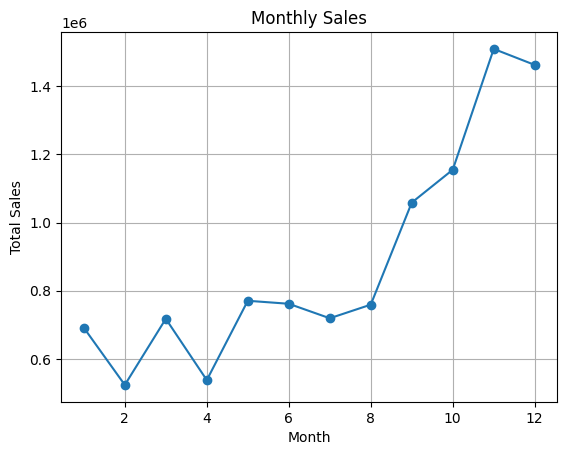

In [ ]:
monthly_sales.plot(kind = "line", title = "Monthly Sales", marker = "o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

## Add insights here

### Top 5 countries

In [ ]:
df4.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34,12


In [ ]:
df4["Country"].value_counts()

,count
Country,
United Kingdom,485123
Germany,9040
France,8407
EIRE,7890
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1966
Portugal,1501


In [ ]:
country_sales = df4.groupby("Country")["TotalSales"].sum()
country_sales

,TotalSales
Country,
Australia,138521.310
Austria,10198.680
Bahrain,754.140
Belgium,41196.340
Brazil,1143.600
Canada,3666.380
Channel Islands,20450.440
Cyprus,13590.380
Czech Republic,826.740


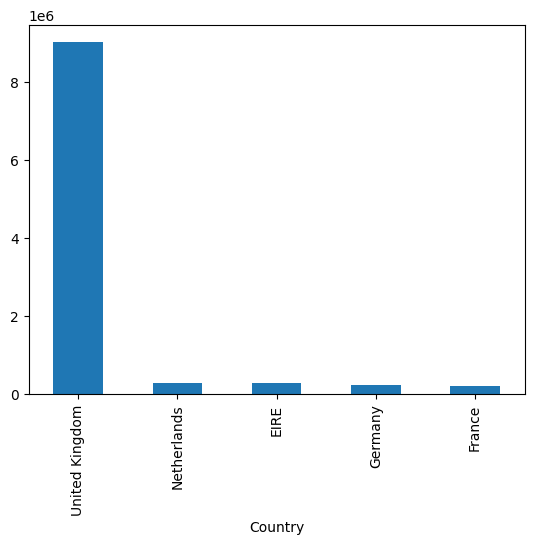

In [ ]:
country_sales_sorted = country_sales.sort_values(ascending=False)
css2 = country_sales_sorted.head(5)
css2.plot(kind = "bar")
plt.xlabel = "Country"
plt.ylabel = "Sales"

In [ ]:
css2

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


<Axes: ylabel='Country'>

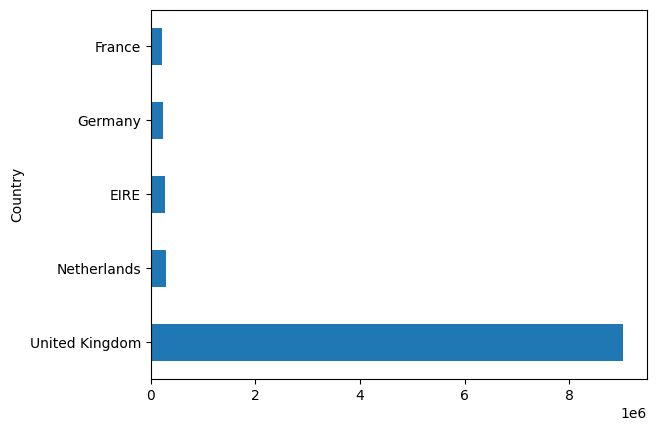

In [ ]:
##Doing the entire thing above in 1-2 lines
df4.groupby("Country")["TotalSales"].sum().sort_values(ascending=False).head(5).plot(kind="barh")

In [ ]:
cs3 = df4.groupby("Country")["TotalSales"].sum()
cs3.head()

,TotalSales
Country,
Australia,138521.31
Austria,10198.68
Bahrain,754.14
Belgium,41196.34
Brazil,1143.60


In [ ]:
cs3.sum()

np.float64(10666684.544)

In [ ]:
type(cs3)

pandas.core.series.Series

In [ ]:
cs4 = cs3.reset_index()
cs4.columns = ['Country', 'TotalSales']


In [ ]:
cs4

,Country,TotalSales
0,Australia,138521.310
1,Austria,10198.680
2,Bahrain,754.140
3,Belgium,41196.340
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20450.440
7,Cyprus,13590.380
8,Czech Republic,826.740
9,Denmark,18955.340


In [ ]:
cs4["TotalSales"].sum()

np.float64(10666684.544)

In [ ]:
cs4["TS_Percentage"] = (cs4['TotalSales']/(cs4["TotalSales"].sum()))*100
cs4

,Country,TotalSales,% of total sales,TS_Percentage
0,Australia,138521.310,1.298635,1.298635
1,Austria,10198.680,0.095612,0.095612
2,Bahrain,754.140,0.007070,0.007070
3,Belgium,41196.340,0.386215,0.386215
4,Brazil,1143.600,0.010721,0.010721
5,Canada,3666.380,0.034372,0.034372
6,Channel Islands,20450.440,0.191723,0.191723
7,Cyprus,13590.380,0.127410,0.127410
8,Czech Republic,826.740,0.007751,0.007751
9,Denmark,18955.340,0.177706,0.177706


In [ ]:
cs4["TS_Percentage"].sum()

np.float64(100.0)

In [ ]:
cs4.sort_values(by="TS_Percentage", ascending=False).head()

,Country,TotalSales,% of total sales,TS_Percentage
36,United Kingdom,9025222.084,84.611315,84.611315
24,Netherlands,285446.340,2.676055,2.676055
10,EIRE,283453.960,2.657376,2.657376
14,Germany,228867.140,2.145626,2.145626
13,France,209715.110,1.966076,1.966076


In [ ]:
cs4.drop(columns =["% of total sales"], inplace=True)

In [ ]:
cs4

,Country,TotalSales,TS_Percentage
0,Australia,138521.310,1.298635
1,Austria,10198.680,0.095612
2,Bahrain,754.140,0.007070
3,Belgium,41196.340,0.386215
4,Brazil,1143.600,0.010721
5,Canada,3666.380,0.034372
6,Channel Islands,20450.440,0.191723
7,Cyprus,13590.380,0.127410
8,Czech Republic,826.740,0.007751
9,Denmark,18955.340,0.177706


In [ ]:
cs5 = cs4.sort_values(by="TS_Percentage", ascending=False).head()
cs5

,Country,TotalSales,TS_Percentage
36,United Kingdom,9025222.084,84.611315
24,Netherlands,285446.340,2.676055
10,EIRE,283453.960,2.657376
14,Germany,228867.140,2.145626
13,France,209715.110,1.966076


<Axes: ylabel='Country'>

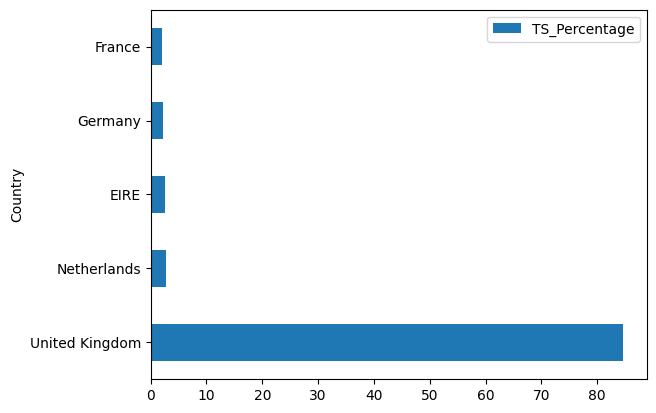

In [ ]:
cs5.plot(x = 'Country', y='TS_Percentage', kind ='barh')

In [ ]:
df4.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34,12


In [ ]:
df4.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,TotalSales,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,15.30,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,20.34,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,22.00,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,20.34,12


In [ ]:
## print description of the top 5 products by total sales

In [ ]:
sc = df4.groupby("StockCode")["TotalSales"].sum().sort_values(ascending = False).head(5)
sc1 = sc.reset_index()
sc1.columns = ["StockCode","TotalSales"]

In [ ]:
type(sc1)

pandas.core.frame.DataFrame

In [ ]:
sc1

,StockCode,TotalSales
0,DOT,206248.77
1,22423,174484.74
2,23843,168469.60
3,85123A,104518.80
4,47566,99504.33


In [ ]:
sc2 = sc1.merge(df4, on="StockCode", how="left")

In [ ]:
sc3 = sc2[["StockCode","Description"]].value_counts()
sc3

,,count
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2265
22423,REGENCY CAKESTAND 3 TIER,2017
47566,PARTY BUNTING,1706
DOT,DOTCOM POSTAGE,706
23843,"PAPER CRAFT , LITTLE BIRDIE",1


In [ ]:
()